Phân phối xác suất chung p_{A,B}(a,b):
 A  B     p_AB
 1  0 0.166667
 1  1 0.000000
 2  0 0.000000
 2  1 0.166667
 3  0 0.166667
 3  1 0.000000
 4  0 0.000000
 4  1 0.166667
 5  0 0.166667
 5  1 0.000000
 6  0 0.000000
 6  1 0.166667 

Phân phối biên p_A(a):
 A      p_A
 1 0.166667
 2 0.166667
 3 0.166667
 4 0.166667
 5 0.166667
 6 0.166667 

Phân phối biên p_B(b):
 B  p_B
 0  0.5
 1  0.5 

Tổng xác suất (nên bằng 1): 0.9999999999999999



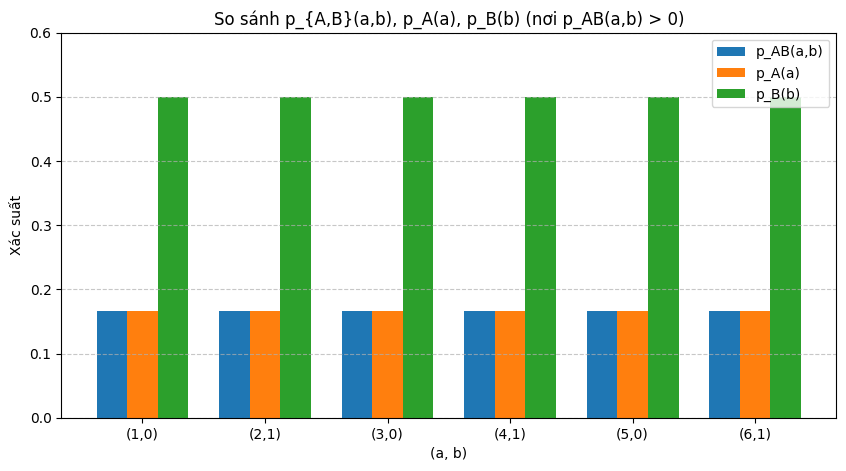

In [3]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt

# Demo code kiểm tra Ví dụ 3.1 và vẽ biểu đồ bất đẳng thức biên

# --- Phần 1: Xây dựng phân phối xác suất chung p_{A,B}(a,b) ---
# A là kết quả tung xúc xắc (1 đến 6)
# B = 0 nếu A là số lẻ, B = 1 nếu A là số chẵn

values_A = list(range(1, 7))  # Giá trị có thể của A
values_B = [0, 1]             # Giá trị có thể của B

# Khởi tạo p_{A,B}(a,b)
p_AB = {}
for a in values_A:
    for b in values_B:
        # Nếu a lẻ và b == 0, hoặc a chẵn và b == 1, gán p = 1/6; ngược lại p = 0
        if (a % 2 == 1 and b == 0) or (a % 2 == 0 and b == 1):
            p_AB[(a, b)] = 1/6
        else:
            p_AB[(a, b)] = 0.0

# Tạo DataFrame để hiển thị p_{A,B}(a,b)
joint_rows = []
for (a, b), p in p_AB.items():
    joint_rows.append({'A': a, 'B': b, 'p_AB': p})
df_joint = pd.DataFrame(joint_rows)

# --- Phần 2: Tính phân phối biên p_A(a) và p_B(b) ---
p_A = {a: sum(p for (a0, b0), p in p_AB.items() if a0 == a) for a in values_A}
p_B = {b: sum(p for (a0, b0), p in p_AB.items() if b0 == b) for b in values_B}

df_marginal_A = pd.DataFrame({'A': list(p_A.keys()), 'p_A': list(p_A.values())})
df_marginal_B = pd.DataFrame({'B': list(p_B.keys()), 'p_B': list(p_B.values())})

# --- Phần 3: Kiểm tra tổng xác suất ---
total_probability = sum(p_AB.values())

# In kết quả phân phối
print("Phân phối xác suất chung p_{A,B}(a,b):")
print(df_joint.to_string(index=False), "\n")

print("Phân phối biên p_A(a):")
print(df_marginal_A.to_string(index=False), "\n")

print("Phân phối biên p_B(b):")
print(df_marginal_B.to_string(index=False), "\n")

print(f"Tổng xác suất (nên bằng 1): {total_probability}\n")

# --- Phần 4: Vẽ biểu đồ bất đẳng thức biên ---
# Lọc các cặp (a,b) sao cho p_AB(a,b) > 0
filtered = [(a, b, p) for (a, b), p in p_AB.items() if p > 0]

# Chuẩn bị dữ liệu cho biểu đồ
labels = [f"({a},{b})" for a, b, _ in filtered]
pab_values = [p for _, _, p in filtered]
pa_values = [p_A[a] for a, _, _ in filtered]
pb_values = [p_B[b] for _, b, _ in filtered]

# Vẽ biểu đồ nhóm so sánh p_AB(a,b), p_A(a), p_B(b)
x = range(len(labels))
width = 0.25

plt.figure(figsize=(10, 5))
plt.bar([i - width for i in x], pab_values, width=width, label="p_AB(a,b)")
plt.bar(x, pa_values, width=width, label="p_A(a)")
plt.bar([i + width for i in x], pb_values, width=width, label="p_B(b)")

plt.title("So sánh p_{A,B}(a,b), p_A(a), p_B(b) (nơi p_AB(a,b) > 0)")
plt.xlabel("(a, b)")
plt.ylabel("Xác suất")
plt.xticks(x, labels)
plt.ylim(0, max(pb_values) + 0.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()